# BIFROST intuition plots

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
#from celluloid import Camera
import math
from iminuit import Minuit
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

import sys
import scipy
mpl.rcParams['errorbar.capsize'] = 2
mpl.rcParams['font.size']        = 11 # standard er 45
#mpl.rcParams['font.serif'] = 'Helvetica'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'

def gauss(x,a,mu,sigma,b):
    return  a*np.exp(-(x-mu)** 2 / (2*sigma**2))+b

### McStas: Determining t_Focus_width vs delta E

[0.1        0.16428571 0.22857143 0.29285714 0.35714286 0.42142857
 0.48571429 0.55       0.61428571 0.67857143 0.74285714 0.80714286
 0.87142857 0.93571429 1.        ]
[15. 20. 25. 30. 35. 40. 45. 50.]


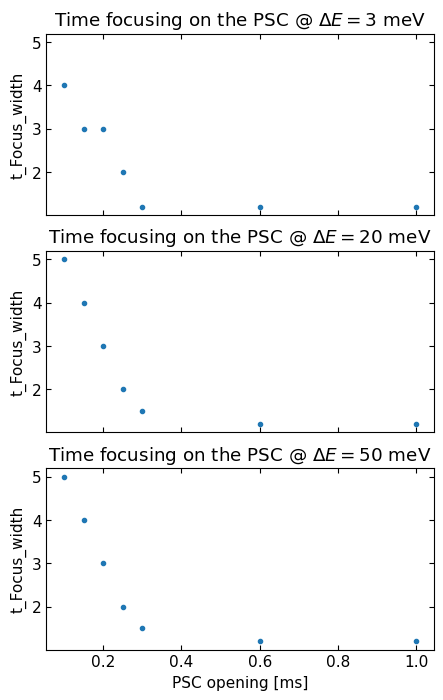

In [2]:
# For energy transfers at 3 meV, made with trail and error and fit by eye.

t_Focus_width = np.array([4, 3, 3, 2, 1.2, 1.2, 1.2])
PSC_opening = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.6, 1])

t_Focus_width_20 = np.array([5, 4, 3, 2, 1.5, 1.2, 1.2])
PSC_opening_20 = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.6, 1])

t_Focus_width_50 = np.array([5, 4, 3, 2, 1.2, 1.2, 1.2])
PSC_opening_50 = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.6, 1])

fig, axs = plt.subplots(3, figsize=(5,8), sharex=True, sharey=True)
axs[0].plot(PSC_opening, t_Focus_width, '.')
axs[0].set_ylabel('t_Focus_width')
axs[0].set_title('Time focusing on the PSC @ $\Delta E = 3$ meV')

axs[1].plot(PSC_opening_20, t_Focus_width_20, '.')
axs[1].set_ylabel('t_Focus_width')
axs[1].set_title('Time focusing on the PSC @ $\Delta E = 20$ meV')

axs[2].plot(PSC_opening_50, t_Focus_width_20, '.')
axs[2].set_ylabel('t_Focus_width')
axs[2].set_xlabel('PSC opening [ms]')
axs[2].set_title('Time focusing on the PSC @ $\Delta E = 50$ meV')

arr = np.linspace(0.1, 1, 15)

e = np.linspace(15,50,8)

print(arr)
print(e)

### Understanding choise of energy transfer interval

[ 2.60430014  3.26924149  3.91327826  4.89380001  6.33186961  7.24784548
  8.15851944  9.06424396  9.96531488 10.86198513 11.75447412 16.16025765
 20.48338763 24.73539201 28.92441558 35.26258108 39.77137085 44.25260984
 48.70799281]
[ 5.02441116  7.10749723  8.14749742  8.52414153  9.62732567 10.73684008
 11.85240388 12.97377596 14.10074646 15.23313054 16.37076391 22.13297062
 28.00908848 33.98950481 40.06722619 42.9473603  48.52884419 54.14629398
 59.79814523]


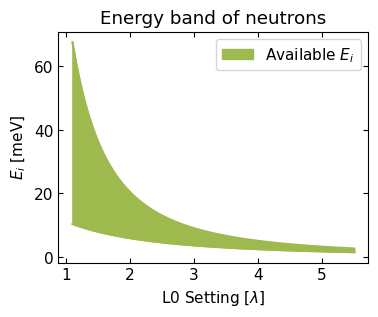

In [80]:
def E0_to_L_max(E0):
    return 1/(0.11056*np.sqrt(E0))

def bandwidth(L_max):
    return L_max-1.7

def wavelength_to_energy(wavelength):
    return (9.0445/wavelength)**2

################# L_0 ################

L_0 = np.linspace(1.1,5.5,1000)

L_1 = L_0+1.7


E_top = wavelength_to_energy(L_0)
E_bot = wavelength_to_energy(L_1)

L_mid = np.array([4.774756761, 4.197374889, 3.795360334, 3.493158913, 3.254644709, 3.059889432, 2.896812122, 2.757578619, 2.636844331, 2.530815462, 2.436711543, 2.086189137, 1.853689128, 1.684954034, 1.55528765, 1.451607582, 1.366247017, 1.294374565, 1.232773838])

Wave_min = np.array([4.034985488, 3.39254966, 3.168636695, 3.097841811, 2.914954173, 2.760236668, 2.627128659, 2.511026905, 2.408593507, 2.31734119, 2.23537346, 1.922492744, 1.708972504, 1.55135841, 1.428860808, 1.380118334, 1.298328496, 1.229136724, 1.169609013])

Wave_max = np.array([5.604528034, 5.002200117, 4.572083973, 4.088476016, 3.594335245, 3.359542195, 3.166495584, 3.004130332, 2.865095154, 2.744289735, 2.638049626, 2.249885531, 1.998405753, 1.818549657, 1.681714492, 1.52309683, 1.434165539, 1.359612406, 1.295938662])

E_mid = wavelength_to_energy(L_mid)

Emax = wavelength_to_energy(Wave_min)
Emin = wavelength_to_energy(Wave_max)

print(Emin)
print(Emax)

################ E_0 #################
#E_range1 = np.linspace(1, 10, 1000)

#E_range = np.linspace(1, 10, 1000)

#L_max1 = E0_to_L_max(E_range1)

#L_min1 = bandwidth(L_max1)

#L_max = E0_to_L_max(E_range)

#L_min = bandwidth(L_max)


#E_max = wavelength_to_energy(L_min)
#E_min = wavelength_to_energy(L_max)

#E_band = E_max - E_min



plt.figure(figsize=(4,3))
plt.plot(L_0, E_top, color='#9eba4f')
plt.plot(L_0, E_bot, color='#9eba4f')
plt.fill_between(L_0, E_top, E_bot, color='#9eba4f', label='Available $E_i$')
#axs[0].plot(L_mid, E_mid,label='E_mid')
#axs[0].plot(Wave_max, Emin,label='E_mid')
plt.title('Energy band of neutrons')
plt.xlabel('L0 Setting [$\lambda$]')
plt.ylabel('$E_i$ [meV]')
plt.legend()
plt.savefig('waveband.png')
#axs[0].set_yscale('log')


#axs[1].plot(E_range, E_max-5, label='E_max')
#axs[1].plot(E_range, E_min-2.7,label='E_min')
#axs[1].set_title('$\Delta E$ [meV]')
#axs[1].set_xlabel('E0 Setting [meV]')
#axs[1].set_ylabel('$\Delta E$ [meV]')
#axs[1].legend()
